In [501]:
import warnings
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [502]:
df = pd.read_csv("data/rent_apts.csv")

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   object 
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 101.2+ KB


In [504]:
df.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [505]:
df.isnull().sum()

Agency            0
Neighborhood      0
Price             0
link              0
sq_mtrs           2
Bedrooms          3
Bathrooms       291
dtype: int64

In [506]:
df[df["Bedrooms"] == 1]["Bathrooms"].value_counts()

Bathrooms
1.0    126
2.0     20
Name: count, dtype: int64

In [507]:
df.groupby("Bedrooms")["Bathrooms"].value_counts()

Bedrooms  Bathrooms
0.0       1.0            5
1.0       1.0          126
          2.0           20
2.0       2.0          374
          3.0           61
          1.0           38
          4.0            1
3.0       3.0          348
          2.0          235
          4.0          177
          5.0           17
          1.0            6
4.0       4.0           69
          3.0           40
          5.0           30
          2.0            4
          1.0            1
          6.0            1
5.0       6.0            2
          5.0            1
6.0       6.0            1
Name: count, dtype: int64

In [508]:
df.dropna(subset=["sq_mtrs", "Bedrooms", "Bathrooms"], inplace=True)

In [509]:
df.isnull().sum()

Agency          0
Neighborhood    0
Price           0
link            0
sq_mtrs         0
Bedrooms        0
Bathrooms       0
dtype: int64

In [510]:
df["Price"] = df["Price"].str.replace(r"[^\d.]", "", regex=True).astype(float)

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 0 to 1846
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1557 non-null   object 
 1   Neighborhood  1557 non-null   object 
 2   Price         1557 non-null   float64
 3   link          1557 non-null   object 
 4   sq_mtrs       1557 non-null   float64
 5   Bedrooms      1557 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(4), object(3)
memory usage: 97.3+ KB


In [512]:
df.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands",155000.0,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North",100000.0,/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North",75000.0,/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North",135000.0,/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
6,Mambo Properties Enterprise,"Off Denis Pritt, Kilimani, Dagoretti North",100000.0,/listings/2-bedroom-apartment-for-rent-kiliman...,14.0,2.0,3.0


In [513]:
df.drop(columns=["link", "Agency"], inplace=True)

In [514]:
df.head()

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
0,"General Mathenge, Westlands",155000.0,4.0,4.0,4.0
1,"Kilimani, Dagoretti North",100000.0,300.0,3.0,4.0
2,"Hatheru Rd,, Lavington, Dagoretti North",75000.0,3.0,3.0,5.0
3,"Kilimani, Dagoretti North",135000.0,227.0,3.0,4.0
6,"Off Denis Pritt, Kilimani, Dagoretti North",100000.0,14.0,2.0,3.0


In [515]:
df["Neighborhood"] = df["Neighborhood"].apply(lambda x: x.split(",")[-1].strip())

In [516]:
df.head()

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
0,Westlands,155000.0,4.0,4.0,4.0
1,Dagoretti North,100000.0,300.0,3.0,4.0
2,Dagoretti North,75000.0,3.0,3.0,5.0
3,Dagoretti North,135000.0,227.0,3.0,4.0
6,Dagoretti North,100000.0,14.0,2.0,3.0


In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 0 to 1846
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  1557 non-null   object 
 1   Price         1557 non-null   float64
 2   sq_mtrs       1557 non-null   float64
 3   Bedrooms      1557 non-null   float64
 4   Bathrooms     1557 non-null   float64
dtypes: float64(4), object(1)
memory usage: 73.0+ KB


In [518]:
df[["Price", "sq_mtrs", "Bedrooms", "Bathrooms"]].corr()

,Price,sq_mtrs,Bedrooms,Bathrooms
Price,1.000000,-0.034092,0.352336,0.440472
sq_mtrs,-0.034092,1.000000,-0.013826,0.003311
Bedrooms,0.352336,-0.013826,1.000000,0.731506
Bathrooms,0.440472,0.003311,0.731506,1.000000


In [519]:
df[["Price", "sq_mtrs", "Bedrooms", "Bathrooms"]].describe()

,Price,sq_mtrs,Bedrooms,Bathrooms
count,1557.000000,1557.000000,1557.000000,1557.000000
mean,98339.751445,375.826590,2.597303,2.595376
std,40175.785665,2220.517532,0.808259,1.000349
min,12000.000000,0.000000,0.000000,1.000000
25%,70000.000000,2.000000,2.000000,2.000000
50%,95000.000000,3.000000,3.000000,2.000000
75%,130000.000000,13.000000,3.000000,3.000000
max,240000.000000,40470.000000,6.000000,6.000000


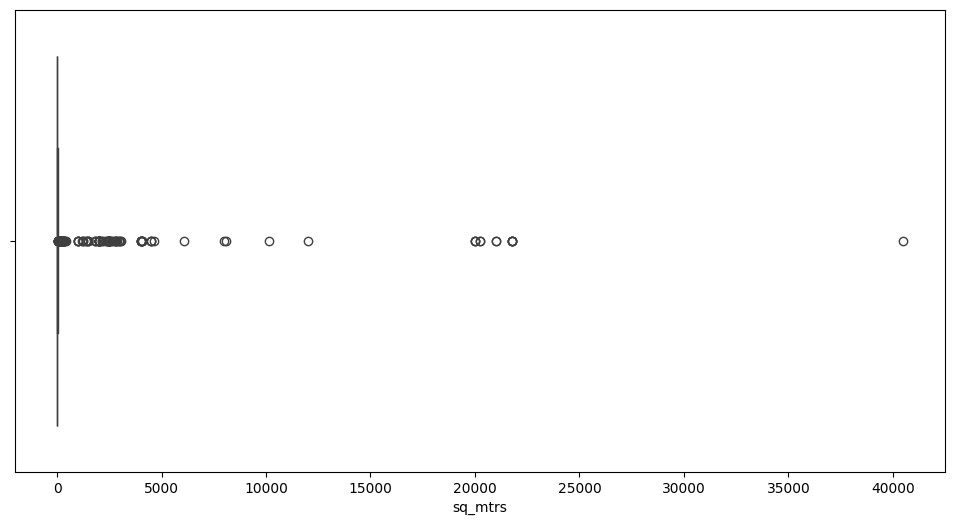

In [520]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["sq_mtrs"])
plt.show()

In [521]:
df["sq_mtrs"].value_counts().sort_index().head(30)

sq_mtrs
0.0       5
1.0     101
2.0     353
3.0     575
4.0     114
5.0       1
6.0       2
7.0       3
8.0       2
9.0       3
11.0      1
12.0      3
13.0      5
14.0      4
15.0      1
16.0      2
18.0      2
20.0      1
22.0      2
23.0     19
24.0      6
25.0      1
28.0      1
35.0      3
45.0      2
46.0      1
48.0      1
51.0      1
55.0      1
70.0      1
Name: count, dtype: int64

In [522]:
df["sq_mtrs"].value_counts().sort_index().tail(10)

sq_mtrs
6071.0     1
8000.0     1
8094.0     1
10118.0    1
12000.0    1
20000.0    3
20235.0    2
21000.0    2
21780.0    5
40470.0    1
Name: count, dtype: int64

In [523]:
df = df[(df["sq_mtrs"] >= 20) & (df["sq_mtrs"] <= 400)]

In [524]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 1 to 1830
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  279 non-null    object 
 1   Price         279 non-null    float64
 2   sq_mtrs       279 non-null    float64
 3   Bedrooms      279 non-null    float64
 4   Bathrooms     279 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [525]:
df[["Price", "sq_mtrs", "Bedrooms", "Bathrooms"]].corr()

,Price,sq_mtrs,Bedrooms,Bathrooms
Price,1.000000,0.183558,0.447221,0.521767
sq_mtrs,0.183558,1.000000,0.356831,0.445426
Bedrooms,0.447221,0.356831,1.000000,0.805723
Bathrooms,0.521767,0.445426,0.805723,1.000000


In [526]:
df[["Price", "sq_mtrs", "Bedrooms", "Bathrooms"]].describe()

,Price,sq_mtrs,Bedrooms,Bathrooms
count,279.000000,279.000000,279.000000,279.000000
mean,104977.584229,154.462366,2.652330,2.820789
std,39630.398655,78.076271,0.798551,1.071272
min,12000.000000,20.000000,1.000000,1.000000
25%,75000.000000,102.500000,2.000000,2.000000
50%,105000.000000,150.000000,3.000000,3.000000
75%,130000.000000,211.500000,3.000000,4.000000
max,200000.000000,371.000000,5.000000,6.000000


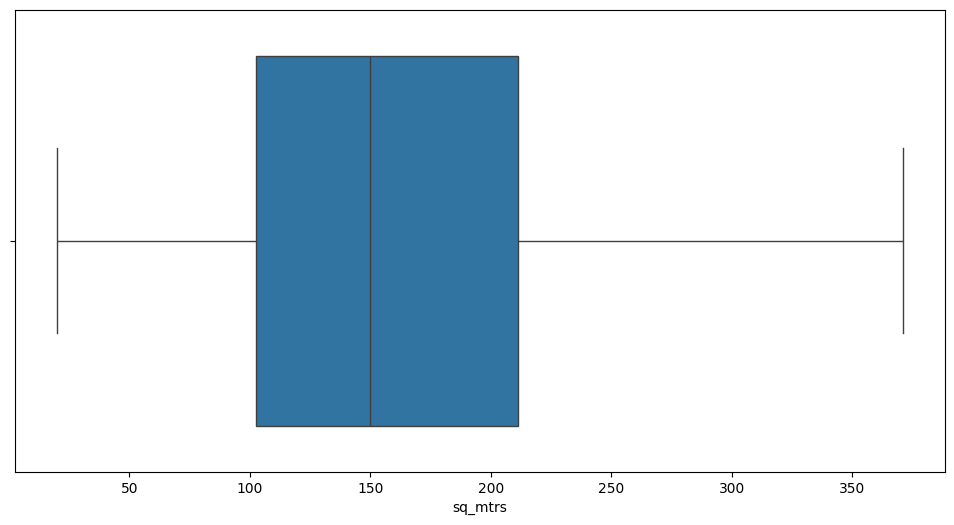

In [527]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["sq_mtrs"])
plt.show()

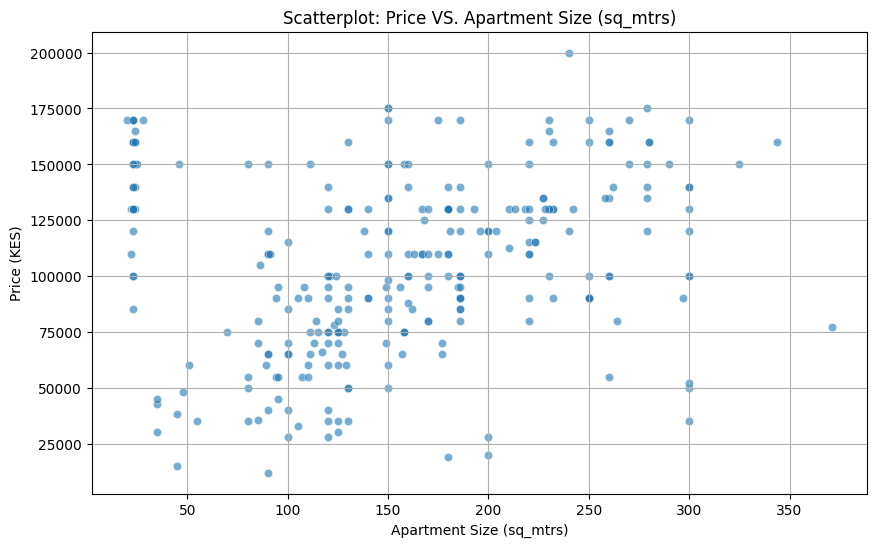

In [528]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="sq_mtrs", y="Price", alpha=0.6)
plt.title("Scatterplot: Price VS. Apartment Size (sq_mtrs)")
plt.xlabel("Apartment Size (sq_mtrs)")
plt.ylabel("Price (KES)")
plt.grid(True)
plt.show()

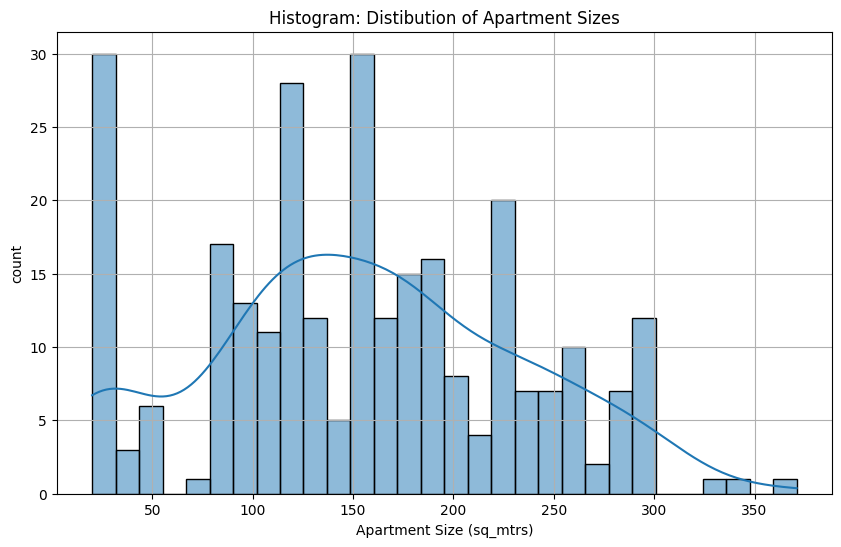

In [529]:
plt.figure(figsize=(10, 6))
sns.histplot(df["sq_mtrs"], bins=30, kde=True)
plt.title("Histogram: Distibution of Apartment Sizes")
plt.xlabel("Apartment Size (sq_mtrs)")
plt.ylabel("count")
plt.grid(True)
plt.show()

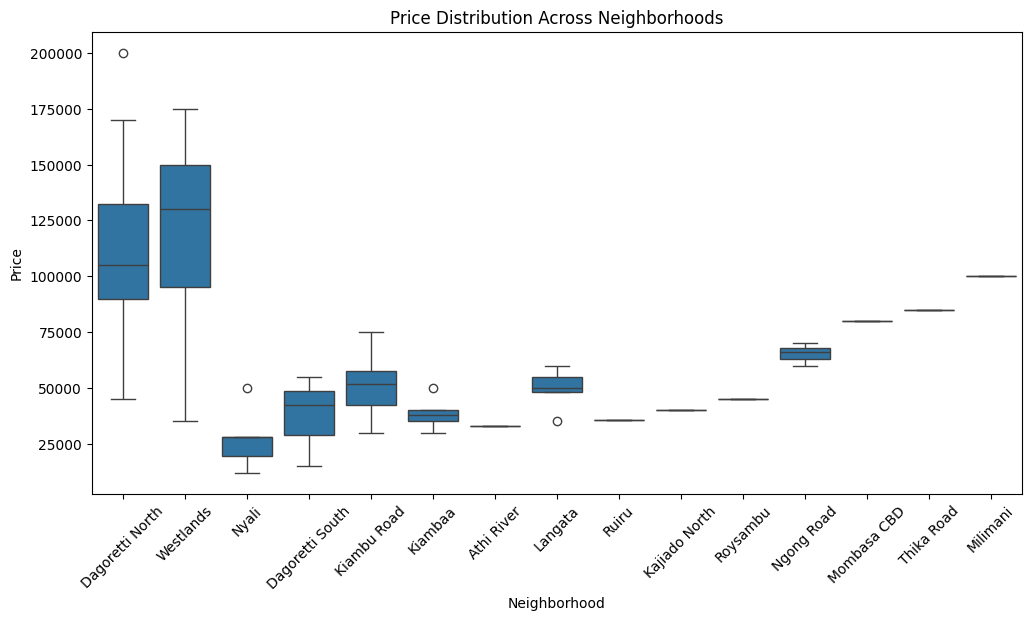

In [530]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Neighborhood', y='Price')
plt.xticks(rotation=45)
plt.title('Price Distribution Across Neighborhoods')
plt.show()

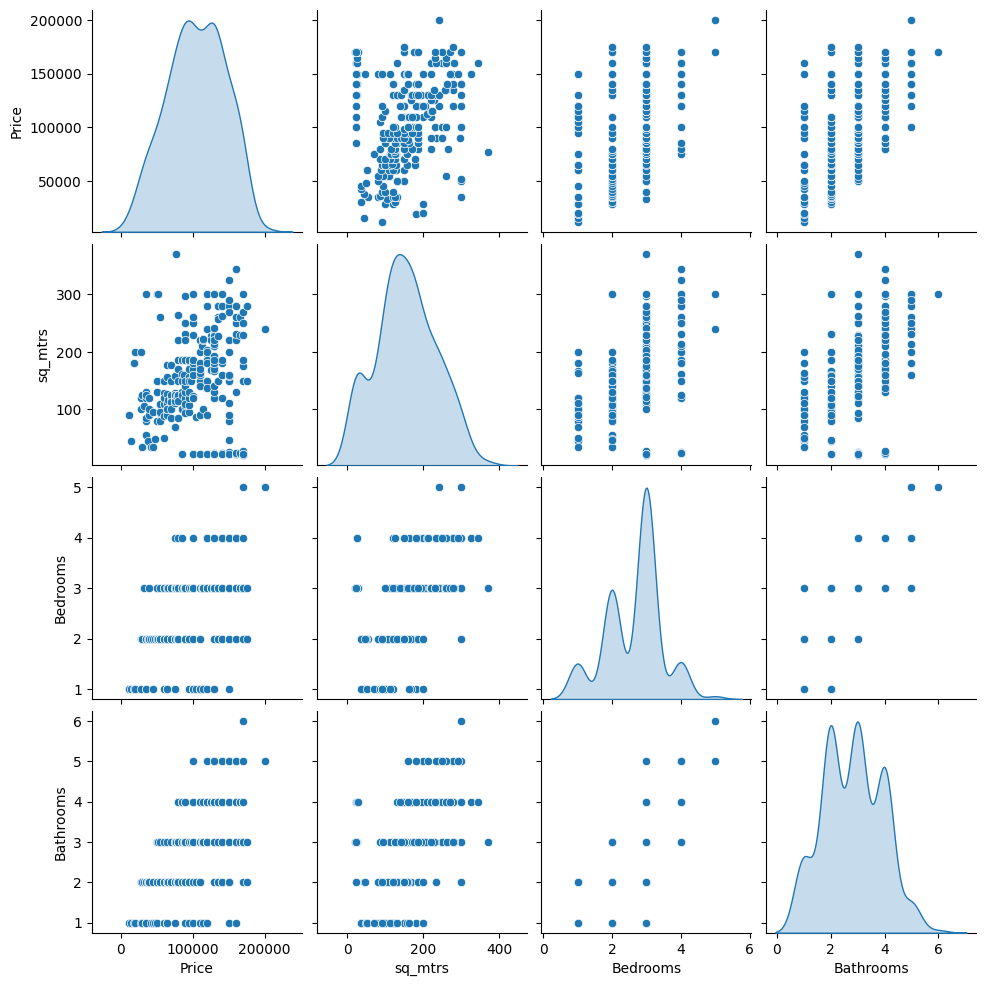

In [531]:
sns.pairplot(df, diag_kind='kde')
plt.show()

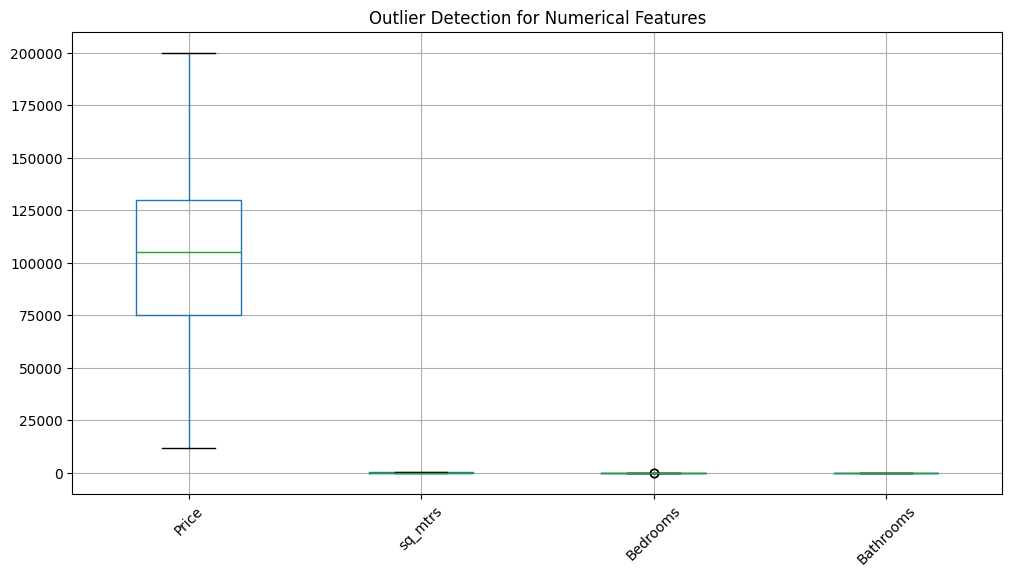

In [532]:
num_cols = ['Price', 'sq_mtrs', 'Bedrooms', 'Bathrooms']
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.title('Outlier Detection for Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [533]:
target = "Price"
features = ["sq_mtrs", "Bedrooms", "Bathrooms", "Neighborhood"]

X_train = df[features]
y_train = df[target]

In [534]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)

print("Mean apt price:", round(y_mean, 2))

print("Baseline MAE:", round(mean_absolute_error(y_train, y_pred_baseline), 2))

Mean apt price: 104977.58
Baseline MAE: 33122.85


In [535]:
model = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse_output=False),
    SimpleImputer(),
    Ridge()
)

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [536]:
y_pred_training = model.predict(X_train)
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training), 2))

Training MAE: 16014.11


In [537]:
X_test = pd.read_csv("data/rent_apts.csv")
X_test = X_test[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    85667.183958
1    66406.517075
2    84398.141294
3    88116.291366
4    71506.813486
dtype: float64